- What column is likely the best column to merge the two tables on?

In [2]:
import pickle

movies = pickle.load(open("movies.p", "rb"))
financials = pickle.load(open("financials.p", "rb"))

print(movies.head())
print("................................")
print(financials.head())

answer = "on='id'"

      id                 title  popularity release_date
0    257          Oliver Twist   20.415572   2005-09-23
1  14290  Better Luck Tomorrow    3.877036   2002-01-12
2  38365             Grown Ups   38.864027   2010-06-24
3   9672              Infamous    3.680896   2006-11-16
4  12819       Alpha and Omega   12.300789   2010-09-17
................................
       id     budget       revenue
0   19995  237000000  2.787965e+09
1     285  300000000  9.610000e+08
2  206647  245000000  8.806746e+08
3   49026  250000000  1.084939e+09
4   49529  260000000  2.841391e+08


- Merge the movies table, as the left table, with the financials table using a left join, and save the result to movies_financials.

In [3]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on="id", how="left")
print(movies_financials.head())

      id                 title  popularity release_date      budget  \
0    257          Oliver Twist   20.415572   2005-09-23  50000000.0   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12         NaN   
2  38365             Grown Ups   38.864027   2010-06-24  80000000.0   
3   9672              Infamous    3.680896   2006-11-16  13000000.0   
4  12819       Alpha and Omega   12.300789   2010-09-17  20000000.0   

       revenue  
0   42093706.0  
1          NaN  
2  271430189.0  
3    1151330.0  
4   39300000.0  


- Count the number of rows in movies_financials with a null value in the budget column.

In [4]:
# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isnull().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


- Merge toy_story and taglines on the id column with a left join, and save the result as toystory_tag.

In [5]:
taglines = pickle.load(open("taglines.p", "rb"))

# Merge the toy_story and taglines tables with a left join
toystory_tag = movies.merge(taglines, on="id", how="left")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

         id                 title  popularity release_date  \
0       257          Oliver Twist   20.415572   2005-09-23   
1     14290  Better Luck Tomorrow    3.877036   2002-01-12   
2     38365             Grown Ups   38.864027   2010-06-24   
3      9672              Infamous    3.680896   2006-11-16   
4     12819       Alpha and Omega   12.300789   2010-09-17   
...     ...                   ...         ...          ...   
4798   3089             Red River    5.344815   1948-08-26   
4799  11934   The Hudsucker Proxy   14.188982   1994-03-11   
4800  13807                Exiled    8.486390   2006-09-06   
4801  73873          Albert Nobbs    7.802245   2011-12-21   
4802  11622   Blast from the Past    8.737058   1999-02-12   

                                                tagline  
0                                                   NaN  
1                  Never underestimate an overachiever.  
2       Boys will be boys. . . some longer than others.  
3               There's

- With toy_story as the left table, merge to it taglines on the id column with an inner join, and save as toystory_tag.

In [6]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = movies.merge(taglines, on="id", how="inner")

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

         id                 title  popularity release_date  \
0     14290  Better Luck Tomorrow    3.877036   2002-01-12   
1     38365             Grown Ups   38.864027   2010-06-24   
2      9672              Infamous    3.680896   2006-11-16   
3     12819       Alpha and Omega   12.300789   2010-09-17   
4     49529           John Carter   43.926995   2012-03-07   
...     ...                   ...         ...          ...   
3950  12281            Mean Creek    8.519202   2004-01-15   
3951   3089             Red River    5.344815   1948-08-26   
3952  11934   The Hudsucker Proxy   14.188982   1994-03-11   
3953  73873          Albert Nobbs    7.802245   2011-12-21   
3954  11622   Blast from the Past    8.737058   1999-02-12   

                                                tagline  
0                  Never underestimate an overachiever.  
1       Boys will be boys. . . some longer than others.  
2               There's more to the story than you know  
3                      


The output of a one-to-many merge with a left join will have greater than or equal rows than the left table.

In [7]:
movie_to_genres = pickle.load(open("movie_to_genres.p", "rb"))

print(movie_to_genres.head())

scifi_movies = movie_to_genres[movie_to_genres["genre"]=="Science Fiction"]
action_movies = movie_to_genres[movie_to_genres["genre"]=="Action"]

   movie_id            genre
0         5            Crime
1         5           Comedy
2        11  Science Fiction
3        11           Action
4        11        Adventure


- Merge action_movies and scifi_movies tables with a right join on movie_id. Save the result as action_scifi.

In [8]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on="movie_id", how = "right")

- Update the merge to add suffixes, where '_act' and '_sci' are suffixes for the left and right tables, respectively.

In [9]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right', suffixes = ('_act' , '_sci')
                                   )

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction


- From action_scifi, subset only the rows where the genre_act column is null.

In [10]:
# Merge action_movies to the scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act','_sci'))

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi["genre_act"].isnull()]

print(scifi_only.head())

   movie_id genre_act        genre_sci
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
5        68       NaN  Science Fiction
6        74       NaN  Science Fiction


- Merge movies and scifi_only using the id column in the left table and the movie_id column in the right table with an inner join.

In [11]:
# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on = "id", right_on="movie_id", how="inner")

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


- Merge movie_to_genres and pop_movies using a right join. Save the results as genres_movies.
- Group genres_movies by genre and count the number of id values.

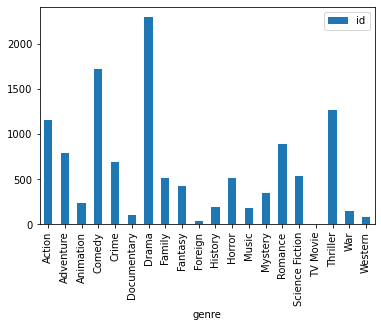

In [12]:
import matplotlib.pyplot as plt
pop_movies = movies

# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on="movie_id", 
                                      right_on="id")

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

- Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
- Create an index that returns True if name_1 or name_2 are null, and False otherwise.

In [13]:
#

import pandas as pd
actors = pd.read_csv("actors_movies.csv")
print(actors.head())

                                               Actor                   Title
0  [Emil Eifrem,Hugo Weaving,Laurence Fishburne,C...              The Matrix
1  [Hugo Weaving,Laurence Fishburne,Carrie-Anne M...     The Matrix Reloaded
2  [Hugo Weaving,Laurence Fishburne,Carrie-Anne M...  The Matrix Revolutions
3           [Al Pacino,Charlize Theron,Keanu Reeves]    The Devil's Advocate
4  [James Marshall,Kevin Pollak,J.T. Walsh,Aaron ...          A Few Good Men


In [14]:
ironman = actors[actors["Title"].str.contains('bi', case=False)]
print(ironman.head())

                                        Actor             Title
17  [Robin Williams,Nathan Lane,Gene Hackman]      The Birdcage
31              [Robin Williams,Oliver Platt]  Bicentennial Man


In [22]:
casts = pickle.load(open("casts.p", "rb"))
movie_casts = casts.merge(movies, left_on = "movie_id", right_on = "id", how ="outer", suffixes=("","_movies"))
#print(casts.head())

#print(movies.head())
print(movie_casts.head())

ironman = movie_casts[movie_casts["title"].str.contains('iron', case=False)]
print(ironman.columns)
print(ironman["title"].unique())

   movie_id  cast_id character  gender      id               name  id_movies  \
0       5.0     22.0   Jezebel     1.0  3122.0        Sammi Davis          5   
1       5.0     23.0     Diana     1.0  3123.0  Amanda de Cadenet          5   
2       5.0     24.0    Athena     1.0  3124.0     Valeria Golino          5   
3       5.0     25.0   Elspeth     1.0  3125.0            Madonna          5   
4       5.0     26.0       Eva     1.0  3126.0          Ione Skye          5   

        title  popularity release_date  
0  Four Rooms    22.87623   1995-12-09  
1  Four Rooms    22.87623   1995-12-09  
2  Four Rooms    22.87623   1995-12-09  
3  Four Rooms    22.87623   1995-12-09  
4  Four Rooms    22.87623   1995-12-09  
Index(['movie_id', 'cast_id', 'character', 'gender', 'id', 'name', 'id_movies',
       'title', 'popularity', 'release_date'],
      dtype='object')
['Iron Man' 'The Man in the Iron Mask' 'Gridiron Gang' 'Iron Man 2'
 'The Iron Giant' 'Ironclad' 'Iron Man 3' 'The Iron Lady

In [23]:
iron_1_actors = ironman[ironman["title"] == 'Iron Man']
iron_2_actors = ironman[ironman["title"] == 'Iron Man 2']



- Save to iron_1_and_2 the merge of iron_1_actors (left) with iron_2_actors tables with an outer join on the id column, and set suffixes to ('_1','_2').
- Create an index that returns True if name_1 or name_2 are null, and False otherwise.

In [24]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on= "id",
                                     how = "outer",
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isnull()) | 
     (iron_1_and_2['name_2'].isnull()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

   movie_id_1  cast_id_1                                   character_1  \
0      1726.0        9.0                                        Yinsen   
2      1726.0       11.0                   Obadiah Stane / Iron Monger   
3      1726.0       12.0  Lt. Col. James "Rhodey" Rhodes / War Machine   
5      1726.0       18.0                                          Raza   
8      1726.0       23.0                                    Abu Bakaar   

   gender_1        id           name_1  id_movies_1   title_1  popularity_1  \
0       2.0   17857.0       Shaun Toub       1726.0  Iron Man    120.725053   
2       2.0    1229.0     Jeff Bridges       1726.0  Iron Man    120.725053   
3       2.0   18288.0  Terrence Howard       1726.0  Iron Man    120.725053   
5       2.0   57452.0      Faran Tahir       1726.0  Iron Man    120.725053   
8       2.0  173810.0    Sayed Badreya       1726.0  Iron Man    120.725053   

  release_date_1  movie_id_2  cast_id_2 character_2  gender_2 name_2  \
0     20

- To a variable called crews_self_merged, merge the crews table to itself on the id column using an inner join, setting the suffixes to '_dir' and '_crew' for the left and right tables respectively.

In [25]:
crews = pickle.load(open("crews.p", "rb"))

# Merge the crews table to itself
crews_self_merged = crews.merge(crews, on="id", how="inner", suffixes=('_dir' , '_crew'))

- Create a Boolean index, named boolean_filter, that selects rows from the left table with the job of 'Director' and avoids rows with the job of 'Director' in the right table.
- Use the .head() method to print the first few rows of direct_crews.

In [28]:
# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


Select the true statement about merging a table to itself.:
- Merging a table to itself is like working with two separate tables.
- You can merge a table to itself with any join.
- Merging a table to itself can allow you to compare values in a column to other values in the same column.

- Merge movies and ratings on the index and save to a variable called movies_ratings, ensuring that all of the rows from the movies table are returned.

In [29]:
ratings = pickle.load(open("ratings.p", "rb"))

# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on="id")

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


- With the sequels table on the left, merge to it the financials table on index named id, ensuring that all the rows from the sequels are returned and some rows from the other table may not be returned, Save the results to sequels_fin.

In [31]:
sequels = pickle.load(open("sequels.p", "rb"))

# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on="id", how="left")


- Merge the sequels_fin table to itself with an inner join, where the left and right tables merge on sequel and id respectively with suffixes equal to ('_org','_seq'), saving to orig_seq.

In [34]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
#  right_index=True,
orig_seq = sequels_fin.merge(sequels_fin, how="inner", left_on="sequel", 
                             right_on="id",
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

- Select the title_org, title_seq, and diff columns of orig_seq and save this as titles_diff.

In [35]:
# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

- Sort by titles_diff by diff in descending order and print the first few rows.

In [38]:
# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending = False).head())

            title_org        title_seq          diff
28  Jurassic Park III   Jurassic World  1.144748e+09
26      Batman Begins  The Dark Knight  6.303398e+08
11         Iron Man 2       Iron Man 3  5.915067e+08
1         Toy Story 2      Toy Story 3  5.696028e+08
14  Quantum of Solace          Skyfall  5.224703e+08
